# P8.1
Prepare a code which draw for given network plot of the relation
C(k). [1P]

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def plot_C_of_k(G, title="C(k) relation"):
    degrees = dict(G.degree())
    clustering = nx.clustering(G)

    ck = {}

    k_nodes = []
    c_nodes = []

    for node in G.nodes():
        k = degrees[node]
        c = clustering[node]

        if k > 0:
            k_nodes.append(k)
            c_nodes.append(c)

        if k not in ck:
            ck[k] = []
        ck[k].append(c)

    k_vals = sorted(ck.keys())
    Ck_vals = [np.mean(ck[k]) for k in k_vals]

    plt.figure()
    plt.scatter(k_nodes, c_nodes, alpha=0.4, s=10, label="Nodes")
    plt.plot(k_vals, Ck_vals, 'r-', linewidth=2, label="Average C(k)")

    plt.xlabel("k (node degree)")
    plt.ylabel("C (clustering coefficient)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()



# P8.2
Find examples of hierarchical and non-hierarchical networks in
available repositories, check by drawing graphs from the task
P8.1. [0.5P]


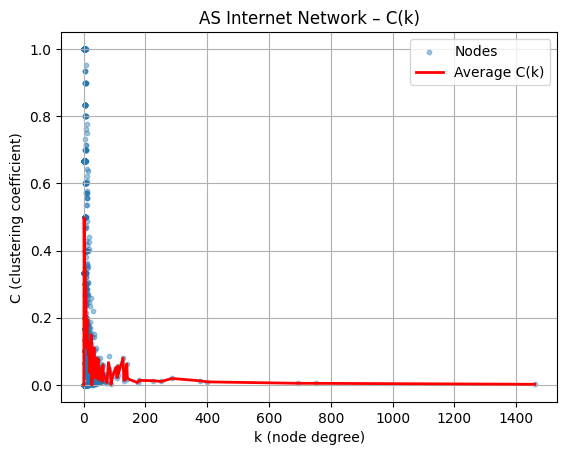

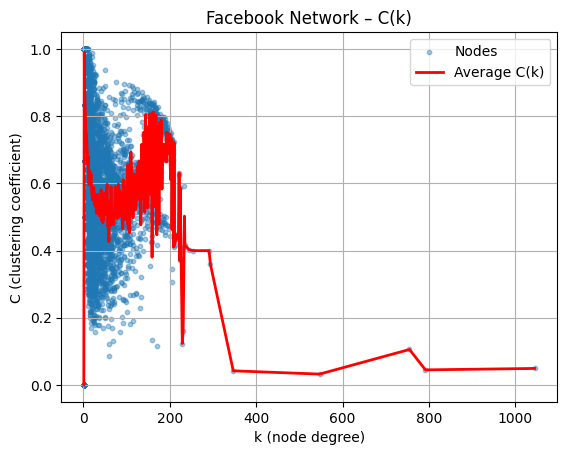

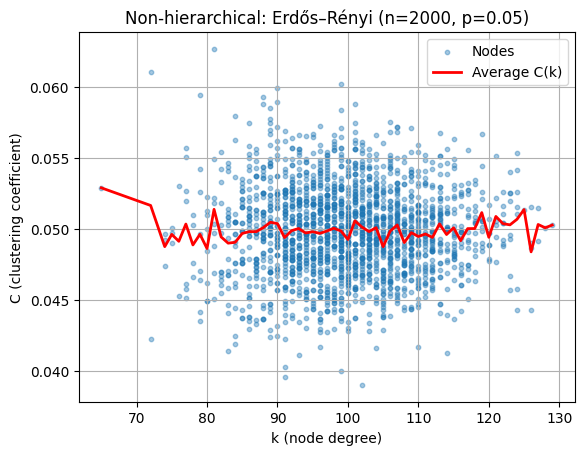

In [8]:
G = nx.read_edgelist("as20000102.txt", nodetype=int)
plot_C_of_k(G, "AS Internet Network – C(k)")

G = nx.read_edgelist(
    "facebook_combined.txt",
    delimiter=" ",
    nodetype=int,
    data=False
)
plot_C_of_k(G, "Facebook Network – C(k)")

G_er = nx.erdos_renyi_graph(
    n=2000,
    p=0.05,
    seed=42
)
plot_C_of_k(G_er, "Non-hierarchical: Erdős–Rényi (n=2000, p=0.05)")



https://snap.stanford.edu/data/as-733.html

https://snap.stanford.edu/data/ego-Facebook.html



# P8.3
Load (perhaps a sub-) set of stops from the data provided by
ZTM Warszawa on the website www.ztm.waw.pl/
pliki-do-pobrania/dane-rozkladowe/. Draw graphs
based on this set of vertices associated with the various types
of mass transport. [2.5P] (for publishing parser for other
students + 1.5P)


calendar + trips on service_id – assign trips to the date ranges when they operate

+ routes on route_id – add route information, including transport mode

+ stop_times on trip_id – expand each trip into an ordered sequence of stops with times

+ stops on stop_id – attach metadata for each stop

In result : one row represents a single trip visiting a specific stop on a given day, with route, mode, and stop order information.

shape: (5822211, 28)
route_type distribution:
route_type
3    4462265
0    1320611
2      39335
Name: count, dtype: int64


,service_id,start_date,end_date,route_id,trip_id,trip_headsign,direction_id,shape_id,agency_id,route_short_name,...,pickup_type,drop_off_type,shape_dist_traveled,timepoint,stop_code,stop_name,stop_lat,stop_lon,arrival_dt,next_stop_id
297866,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,0,1,0.000,1,13,Metro Bródno,52.293529,21.031043,2025-12-05 06:15:00,1614
297867,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,0,0,0.417,1,10,Metro Bródno,52.293676,21.032621,2025-12-05 06:17:00,1751
297868,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,0,0,0.687,1,02,Suwalska,52.296123,21.032985,2025-12-05 06:18:00,1750
297869,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,0,0,0.977,1,02,Turmoncka,52.298815,21.032966,2025-12-05 06:19:00,1627
297870,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,3,3,1.186,1,02,Kopijników,52.300338,21.031980,2025-12-05 06:20:00,1628
297871,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,3,3,1.906,1,02,Gryfitów,52.304213,21.029945,2025-12-05 06:21:00,5354
297872,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,3,3,2.236,1,04,Wielkiego Dębu,52.306963,21.030439,2025-12-05 06:22:00,5356
297873,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,3,3,2.621,1,02,Ojca Aniceta,52.307670,21.036036,2025-12-05 06:23:00,5358
297874,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,3,3,3.181,1,02,Pośrednia,52.310439,21.039658,2025-12-05 06:24:00,5360
297875,0_5,2025-12-05,20251205,0_104,0_5_1963252,104 -> Brzeziny,0,114226,2,104,...,3,3,3.671,1,02,Porzeczkowa,52.314812,21.037972,2025-12-05 06:25:00,3878


TRAM: nodes=622 edges=768
RAIL: nodes=62 edges=126
BUS: nodes=6034 edges=7858


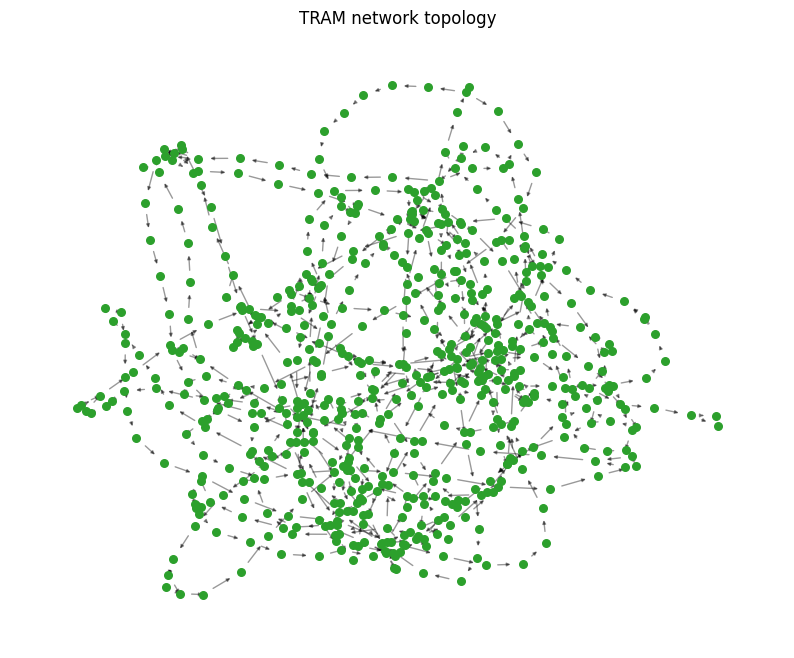

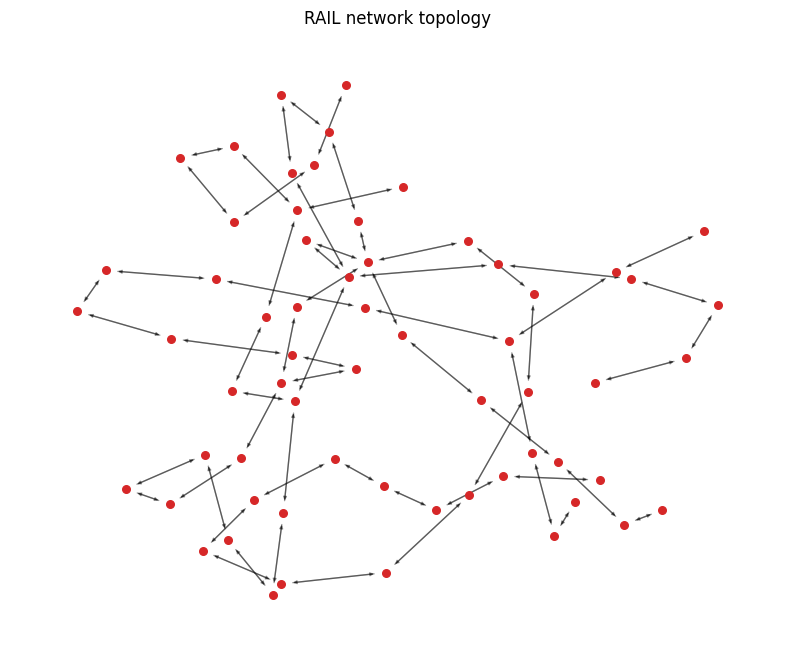

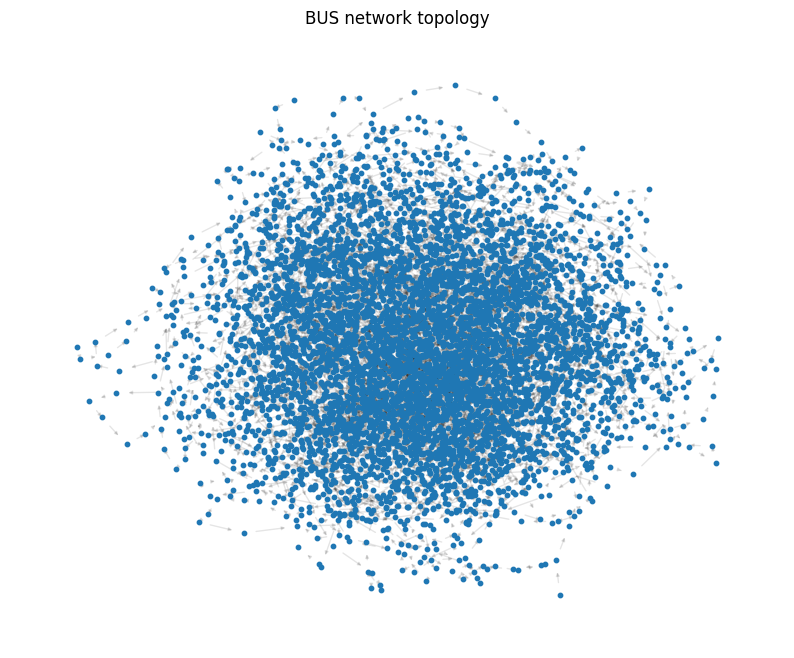

In [29]:
from IPython.display import display


def show_dataset_snapshot(df, rows=10):
    print("shape:", df.shape)
    print("route_type distribution:")
    print(df["route_type"].value_counts(dropna=False))
    display(df.head(rows))


def prepare_gtfs_dataframe(preview=True):
    cal = pd.read_csv("calendar.txt", usecols=["service_id", "start_date", "end_date"])
    trp = pd.read_csv("trips.txt")
    rte = pd.read_csv("routes.txt")
    stt = pd.read_csv("stop_times.txt")
    stp = pd.read_csv("stops.txt")

    merged = (
        cal
        .merge(trp, on="service_id")
        .merge(rte, on="route_id")
        .merge(stt, on="trip_id")
        .merge(stp, on="stop_id")
    )

    merged = merged[
        (merged["arrival_time"] < "24:00:00") &
        (merged["departure_time"] < "24:00:00")
    ]

    merged["start_date"] = pd.to_datetime(merged["start_date"], format="%Y%m%d")
    merged["arrival_time"] = pd.to_datetime(merged["arrival_time"], format="%H:%M:%S").dt.time
    merged["departure_time"] = pd.to_datetime(merged["departure_time"], format="%H:%M:%S").dt.time

    merged["arrival_dt"] = pd.to_datetime(
        merged["start_date"].dt.date.astype(str) + " " + merged["arrival_time"].astype(str)
    )

    merged = merged.sort_values(["trip_id", "arrival_dt"])

    merged["next_stop_id"] = (
        merged.groupby("trip_id")["stop_id"]
        .shift(-1)
        .astype("Int64")
    )

    merged = merged.dropna(subset=["next_stop_id"])

    if preview:
        show_dataset_snapshot(merged, rows=10)

    return merged


def make_mode_graphs(df):
    type_to_mode = {0: "TRAM", 2: "RAIL", 3: "BUS"}
    result = {}

    usable = df[df["next_stop_id"] != -1]

    for rtype, label in type_to_mode.items():
        part = usable[usable["route_type"] == rtype]
        if part.empty:
            print(f"{label}: no data")
            continue

        g = nx.DiGraph()
        g.add_edges_from(
            part[["stop_id", "next_stop_id"]]
            .drop_duplicates()
            .itertuples(index=False, name=None)
        )

        result[label] = g
        print(f"{label}: nodes={g.number_of_nodes()} edges={g.number_of_edges()}")

    return result


def draw_mode_graphs(graph_dict):
    palette = {"BUS": "#1f77b4", "TRAM": "#2ca02c", "RAIL": "#d62728"}

    for label, g in graph_dict.items():
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(g, k=0.15, iterations=20, seed=42)

        node_size = 10 if label == "BUS" else 30
        edge_alpha = 0.1 if label == "BUS" else 0.4
        color = palette.get(label, "gray")

        nx.draw_networkx_nodes(g, pos, node_size=node_size, node_color=color)
        nx.draw_networkx_edges(g, pos, alpha=edge_alpha, arrows=True, arrowsize=5)

        plt.title(f"{label} network topology")
        plt.axis("off")
        plt.show()


df_gtfs = prepare_gtfs_dataframe(preview=True)
graphs_by_mode = make_mode_graphs(df_gtfs)
draw_mode_graphs(graphs_by_mode)


# P8.4
 Calculate the basic characteristics of each layer, and the whole
network. [1P]


In [30]:
import networkx as nx

def basic_stats(G, name="network"):
    H = G.to_undirected() if G.is_directed() else G

    N = H.number_of_nodes()
    E = H.number_of_edges()

    print(f"\n=== {name} ===")
    print(f"Nodes (N): {N}")
    print(f"Edges (E): {E}")

    if N == 0:
        return

    avg_k = sum(dict(H.degree()).values()) / N
    density = nx.density(H)
    clustering = nx.average_clustering(H)

    components = nx.number_connected_components(H)
    largest_cc = max(nx.connected_components(H), key=len) if components > 0 else set()
    lcc_size = len(largest_cc)

    print(f"Average degree <k>: {avg_k:.3f}")
    print(f"Density ρ: {density:.6f}")
    print(f"Average clustering C: {clustering:.6f}")
    print(f"Connected components: {components}")
    print(f"Largest component size: {lcc_size}")

    if lcc_size > 1:
        H_lcc = H.subgraph(largest_cc).copy()
        diameter = nx.diameter(H_lcc)
        avg_path_len = nx.average_shortest_path_length(H_lcc)
        print(f"Diameter (LCC): {diameter}")
        print(f"Avg shortest path length (LCC): {avg_path_len:.3f}")
    else:
        print("Diameter (LCC): None")
        print("Avg shortest path length (LCC): None")


mode_order = ["tram", "bus", "rail"]
for mode in mode_order:
    if mode in graphs:
        basic_stats(graphs[mode], f"{mode.upper()} layer")

G_all = nx.compose_all([graphs[m] for m in mode_order if m in graphs])
basic_stats(G_all, "WHOLE (TRAM+BUS+RAIL) NETWORK")



=== TRAM layer ===
Nodes (N): 622
Edges (E): 768
Average degree <k>: 2.469
Density ρ: 0.003977
Average clustering C: 0.001983
Connected components: 1
Largest component size: 622
Diameter (LCC): 48
Avg shortest path length (LCC): 18.474

=== BUS layer ===
Nodes (N): 6034
Edges (E): 7852
Average degree <k>: 2.603
Density ρ: 0.000431
Average clustering C: 0.022405
Connected components: 1
Largest component size: 6034
Diameter (LCC): 123
Avg shortest path length (LCC): 34.353

=== RAIL layer ===
Nodes (N): 62
Edges (E): 63
Average degree <k>: 2.032
Density ρ: 0.033316
Average clustering C: 0.000000
Connected components: 1
Largest component size: 62
Diameter (LCC): 26
Avg shortest path length (LCC): 9.660

=== WHOLE (TRAM+BUS+RAIL) NETWORK ===
Nodes (N): 6702
Edges (E): 8677
Average degree <k>: 2.589
Density ρ: 0.000386
Average clustering C: 0.020356
Connected components: 2
Largest component size: 6640
Diameter (LCC): 123
Avg shortest path length (LCC): 33.825


# P8.5
 Translate GPS coordinates to configuration of the vertices and
draw graph in proper, geographic, configuration. [2P]


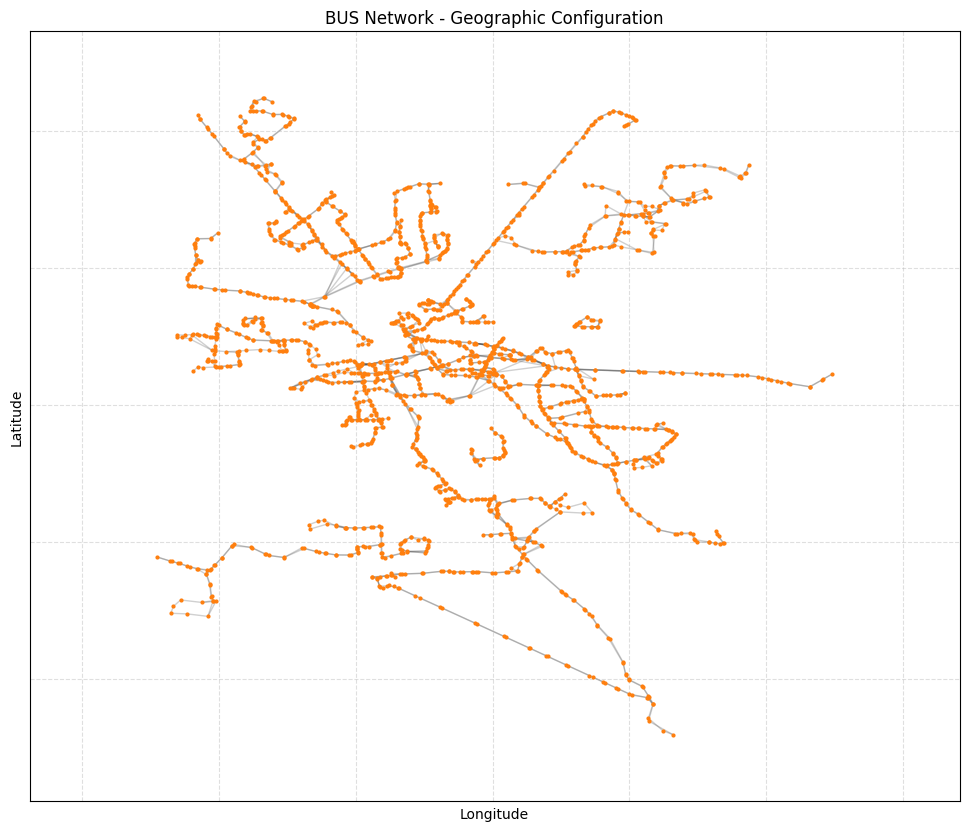

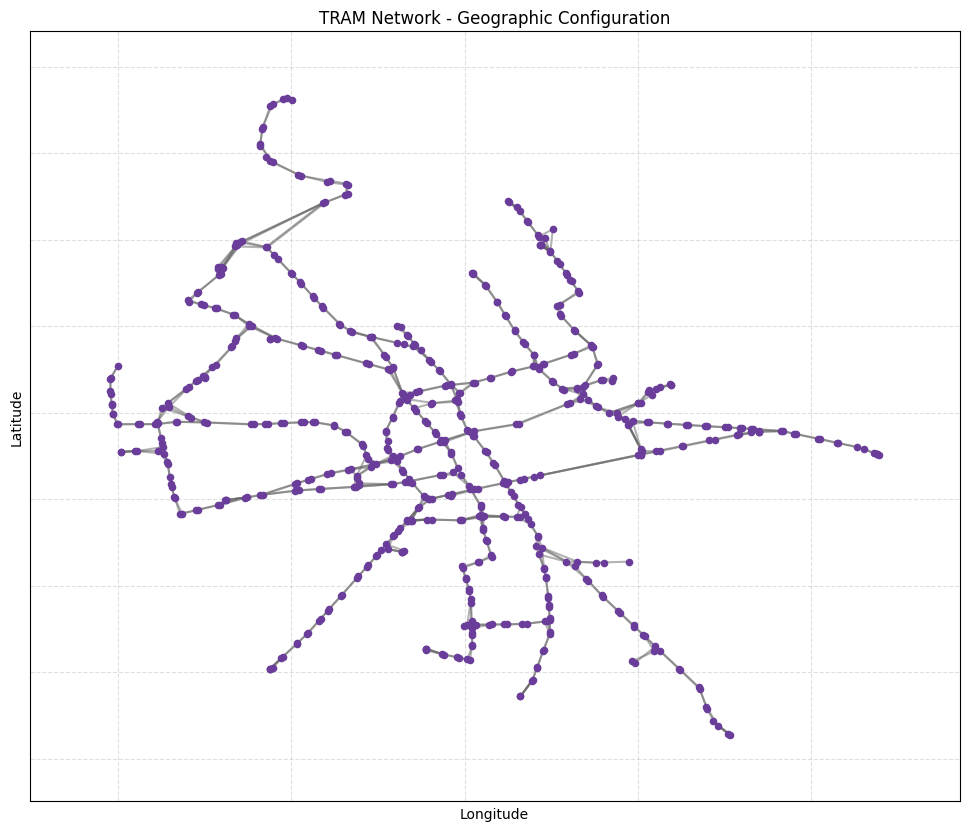

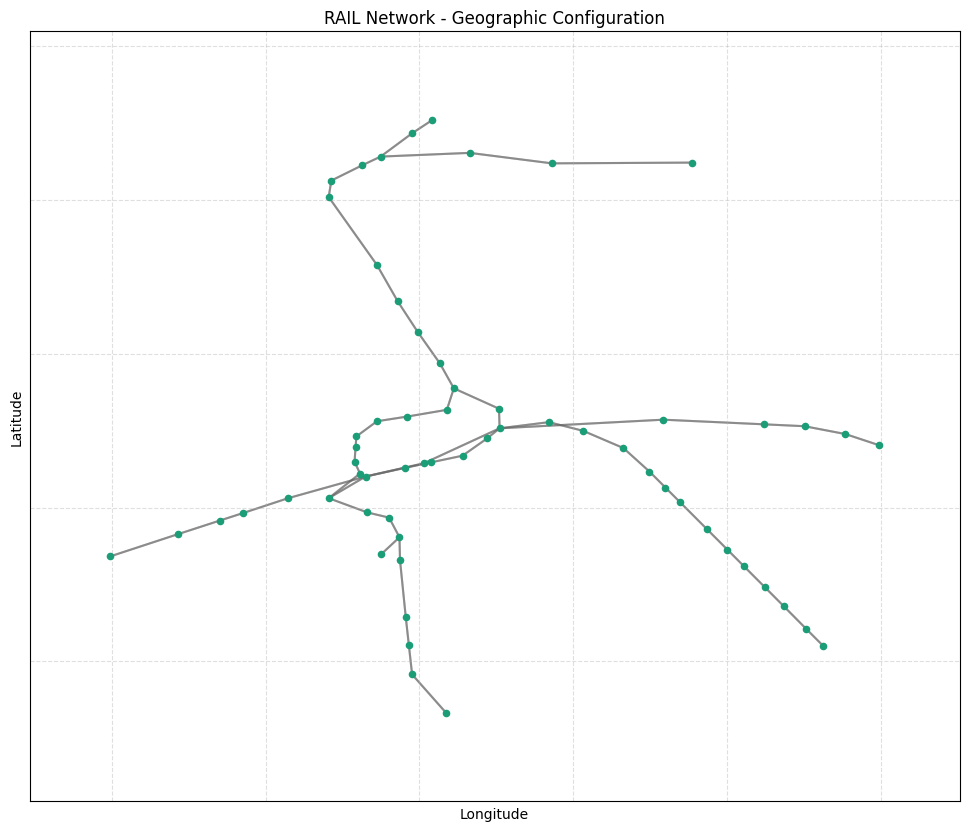

In [31]:
import numpy as np

def build_stop_pos_map(df):
    coord_rows = df.loc[df["stop_lon"].notna() & df["stop_lat"].notna(), ["stop_id", "stop_lon", "stop_lat"]]
    coord_rows = coord_rows.drop_duplicates(subset=["stop_id"])
    return dict(zip(coord_rows["stop_id"], zip(coord_rows["stop_lon"], coord_rows["stop_lat"])))

def geo_draw_layer(G, pos_map, title, max_nodes=None):
    nodes = [n for n in G.nodes() if n in pos_map]

    if not nodes:
        print(f"No coordinates for: {title}")
        return

    if max_nodes is not None and len(nodes) > max_nodes:
        nodes = nodes[:max_nodes]

    H = G.subgraph(nodes).copy()
    local_pos = {n: pos_map[n] for n in H.nodes()}

    is_bus = ("BUS" in title.upper())

    node_size = 4 if is_bus else 20

    if is_bus:
        edge_alpha = 0.25
        edge_width = 1.0
        edge_color = "#444444"
        node_color = "#ff7f0e"
    else:
        edge_alpha = 0.5
        edge_width = 1.5
        edge_color = "#666666"
        node_color = "#6a3d9a" if "TRAM" in title.upper() else "#1b9e77"

    plt.figure(figsize=(12, 10))

    nx.draw_networkx_nodes(
        H,
        local_pos,
        node_size=node_size,
        node_color=node_color
    )

    nx.draw_networkx_edges(
        H,
        local_pos,
        alpha=edge_alpha,
        width=edge_width,
        edge_color=edge_color,
        arrows=False
    )

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.axis("equal")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()


df_gtfs = df_gtfs if "df_gtfs" in globals() else df
graphs_by_mode = graphs_by_mode if "graphs_by_mode" in globals() else graphs

pos_map = build_stop_pos_map(df_gtfs)

key_map = {"bus": "BUS", "tram": "TRAM", "rail": "RAIL"}
for k, label in key_map.items():
    if k in graphs_by_mode:
        geo_draw_layer(
            graphs_by_mode[k],
            pos_map,
            f"{label} Network - Geographic Configuration",
            max_nodes=2000 if k == "bus" else None
        )
    elif label in graphs_by_mode:
        geo_draw_layer(
            graphs_by_mode[label],
            pos_map,
            f"{label} Network - Geographic Configuration",
            max_nodes=2000 if label == "BUS" else None
        )


# P8.6
 Taking into account the time table data, obtain the temporal
network from the graphs from the previous task. [1P]


In [36]:
import pandas as pd

def build_temporal_edges(df, layers=("tram", "bus", "rail")):
    tmp = df.copy()

    required = [
        "trip_id",
        "route_type",
        "stop_id",
        "next_stop",
        "arrival_datetime"
    ]
    missing = [c for c in required if c not in tmp.columns]
    if missing:
        raise ValueError(f"Missing columns in df: {missing}")

    tmp = tmp.sort_values(by=["trip_id", "arrival_datetime"])

    tmp["next_arrival_datetime"] = (
        tmp.groupby("trip_id")["arrival_datetime"]
        .shift(-1)
    )

    mask = (tmp["next_stop"] != -1) & tmp["next_arrival_datetime"].notna()
    tmp = tmp[mask].copy()

    type_to_layer = {0: "tram", 2: "rail", 3: "bus"}
    tmp["mode"] = tmp["route_type"].map(type_to_layer)

    tmp = tmp[tmp["mode"].isin(layers)]

    temporal_edges = tmp[[
        "stop_id",
        "next_stop",
        "arrival_datetime",
        "next_arrival_datetime",
        "mode"
    ]].copy()

    temporal_edges.columns = ["u", "v", "t_start", "t_end", "mode"]
    temporal_edges = temporal_edges.sort_values(by="t_start")

    return temporal_edges


temporal_network = build_temporal_edges(df, layers=("tram", "bus", "rail"))

print(f"Total temporal edges (individual trips between stops): {len(temporal_network)}")
print("First 5 temporal events:")
print(temporal_network.head())

Total temporal edges (individual trips between stops): 5605654
First 5 temporal events:
           u     v             t_start               t_end mode
919151  1536  1537 2025-12-05 03:18:00 2025-12-05 03:19:00  bus
897275  1961  1962 2025-12-05 03:18:00 2025-12-05 03:19:00  bus
897276  1962  1996 2025-12-05 03:19:00 2025-12-05 03:21:00  bus
919152  1537  1874 2025-12-05 03:19:00 2025-12-05 03:20:00  bus
919153  1874  1875 2025-12-05 03:20:00 2025-12-05 03:21:00  bus


# P8.7
 Make an animation of how traffic flows throughout the day. [2.5P]


convert times to minutes

filter edges with valid coordinates

split day into fixed time windows

select edges active in each window

In [33]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

def hhmm_to_minutes(hhmm):
    hh, mm = map(int, hhmm.split(":"))
    return 60 * hh + mm

def dt_to_minutes(ts):
    return int(ts.hour) * 60 + int(ts.minute)

def make_traffic_animation(
    temporal_edges,
    pos_map,
    title="Traffic flow",
    t_start="05:00",
    t_end="23:00",
    step_minutes=20,
    max_edges=6000,
    interval_ms=400,
    save_file="traffic.gif"
):
    data = []
    for u, v, ts in temporal_edges:
        if u in pos_map and v in pos_map:
            data.append((u, v, dt_to_minutes(ts)))

    t_min = hhmm_to_minutes(t_start)
    t_max = hhmm_to_minutes(t_end)
    frames = list(range(t_min, t_max, step_minutes))

    fig, ax = plt.subplots(figsize=(12, 10))

    xs = [pos_map[n][0] for n in pos_map]
    ys = [pos_map[n][1] for n in pos_map]

    def update(frame_time):
        ax.clear()

        current = [(u, v) for (u, v, t) in data if frame_time <= t < frame_time + step_minutes]
        if len(current) > max_edges:
            current = current[:max_edges]

        for u, v in current:
            x = [pos_map[u][0], pos_map[v][0]]
            y = [pos_map[u][1], pos_map[v][1]]
            ax.plot(x, y, linewidth=0.9, alpha=0.6, color="#444444")

        ax.scatter(xs, ys, s=4, alpha=0.6, color="#ff7f0e")

        hour = frame_time // 60
        minute = frame_time % 60
        ax.set_title(f"{title}  {hour:02d}:{minute:02d}", fontsize=14)
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        ax.axis("equal")
        ax.grid(True, linestyle="--", alpha=0.3)

    anim = FuncAnimation(fig, update, frames=frames, interval=interval_ms)
    anim.save(save_file)
    plt.close(fig)
    print("Saved:", save_file)


make_traffic_animation(
    temporal_networks["bus"],
    pos_map,
    title="ZTM Warsaw – BUS traffic",
    t_start="05:00",
    t_end="23:00",
    step_minutes=20,
    max_edges=8000,
    save_file="bus_traffic.gif"
)

MovieWriter ffmpeg unavailable; using Pillow instead.


Saved: bus_traffic.gif


# P8.8
 Check how the selected network metrics depend on time. [1P]


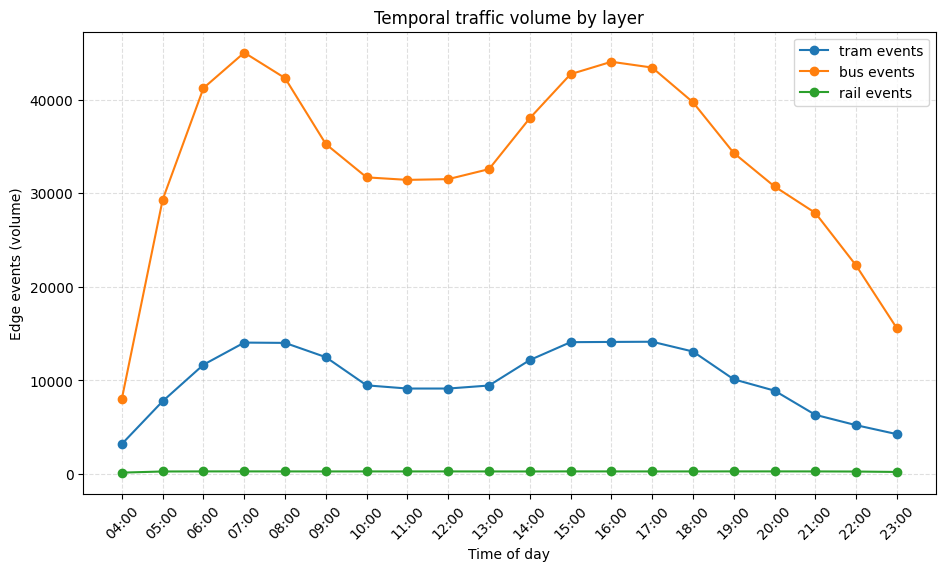

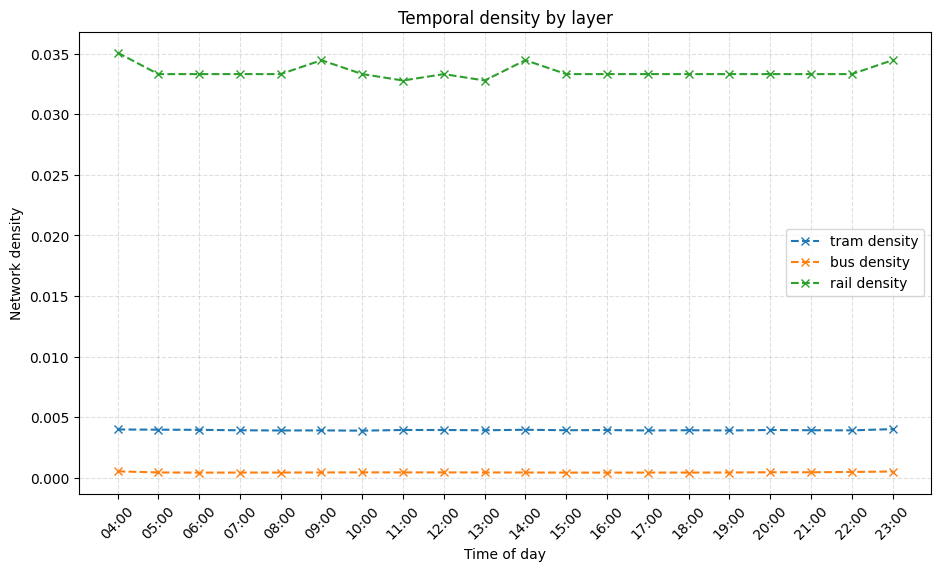

,Hour,Active nodes,Active edges,Edge events,Density,Avg degree,Clustering
0,04:00,4135,4533,8061,0.000530,2.192503,0.008368
1,05:00,5577,6815,29315,0.000438,2.443966,0.016712
2,06:00,5823,7210,41226,0.000425,2.476387,0.018551
3,07:00,5800,7210,45010,0.000429,2.486207,0.018480
4,08:00,5764,7165,42290,0.000431,2.486121,0.018930


In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import timedelta

def edges_to_temporal_frame(temporal_edges):
    df_t = pd.DataFrame(temporal_edges, columns=["u", "v", "ts"])
    df_t["t_min"] = df_t["ts"].dt.floor("min")
    return df_t

def hourly_metric_scan(temporal_edges, start_hour=4, end_hour=24):
    df_t = edges_to_temporal_frame(temporal_edges)
    if df_t.empty:
        return pd.DataFrame()

    base_date = df_t["ts"].iloc[0].date()

    rows = []
    for h in range(start_hour, end_hour):
        w0 = pd.Timestamp(f"{base_date} {h:02d}:00:00")
        w1 = w0 + timedelta(hours=1)

        chunk = df_t[(df_t["ts"] >= w0) & (df_t["ts"] < w1)]
        if chunk.empty:
            continue

        G = nx.Graph()
        G.add_edges_from(chunk[["u", "v"]].drop_duplicates().values)

        n = G.number_of_nodes()
        e = G.number_of_edges()
        dens = nx.density(G)

        if n > 0:
            avg_k = sum(dict(G.degree()).values()) / n
            clust = nx.average_clustering(G)
        else:
            avg_k = 0
            clust = 0

        rows.append({
            "Hour": f"{h:02d}:00",
            "Active nodes": n,
            "Active edges": e,
            "Edge events": len(chunk),
            "Density": dens,
            "Avg degree": avg_k,
            "Clustering": clust
        })

    return pd.DataFrame(rows)

def compare_layers_over_time(temporal_networks, layers=("tram", "bus", "rail"), start_hour=4, end_hour=24):
    metrics = {}
    for layer in layers:
        if layer in temporal_networks:
            metrics[layer] = hourly_metric_scan(temporal_networks[layer], start_hour=start_hour, end_hour=end_hour)

    if not metrics:
        return {}

    plt.figure(figsize=(11, 6))
    for layer, dfm in metrics.items():
        if not dfm.empty:
            plt.plot(dfm["Hour"], dfm["Edge events"], marker="o", label=f"{layer} events")
    plt.xticks(rotation=45)
    plt.xlabel("Time of day")
    plt.ylabel("Edge events (volume)")
    plt.title("Temporal traffic volume by layer")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.show()

    plt.figure(figsize=(11, 6))
    for layer, dfm in metrics.items():
        if not dfm.empty:
            plt.plot(dfm["Hour"], dfm["Density"], marker="x", linestyle="--", label=f"{layer} density")
    plt.xticks(rotation=45)
    plt.xlabel("Time of day")
    plt.ylabel("Network density")
    plt.title("Temporal density by layer")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.show()

    return metrics

layer_metrics = compare_layers_over_time(
    temporal_networks,
    layers=("tram", "bus", "rail"),
    start_hour=4,
    end_hour=24
)

layer_metrics["bus"].head() if "bus" in layer_metrics else None
